![](https://www.kdnuggets.com/wp-content/uploads/text-analysis-acme2.jpg)

# Classificação de texto

 - Tarefa muito importante da área de NLP;
 - Atribui uma categoria a um texto baseado em quê eles falando;
 - Identificação de Spam, classificação de comentários em fóruns de discussões, análise de sentimento em tweets, etc;
 
# Problema
 - Dada a review de um filme dizer se ela é positiva ou negativa;
 
 
    
  


## Carregando o dataset

In [10]:
import pandas as pd

dataset = pd.read_csv("../datasets/imdb-dataset.csv", nrows=2500)

dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
! python --version

Python 3.9.2


## Pré-processamento

In [3]:
# Remoção de acentos

import unidecode

def utf8_to_ascii(text):
    return unidecode.unidecode(text)

In [4]:
# Remoção de tags HTML (<div>, <p>, <h1>, <br>)

import re

def delete_html_nodes(text):
    regex = re.compile("<.+>")
    
    return re.sub(regex, "", text)

In [5]:
# Tokenização "I thought this was" -> ["I", "thought", "this", "was"]

import spacy

def tokenize(corpus, deacc=True, trim_html=True, header="review"):
    nlp = spacy.load("en_core_web_md")
    
    tokens = []
    for index, row in corpus.iterrows():
        document = row[header]
        # remove accents
        if deacc:
            document = utf8_to_ascii(document)
        
        # remove HTML tags and its content
        if trim_html:
            document = delete_html_nodes(document)
        
        spacy_doc = nlp(document)
        
        tokens.append([token for token in spacy_doc])
            
    return tokens

In [6]:
# Remoção de stop words (a, an, as, and, at, both, by, for, to)

def remove_stop_words(corpus):
    _tokens = []
    index = -1
    for document in corpus:
        _tokens.append([])
        index += 1
        
        for token in document:
            if not token.is_stop:
                _tokens[index].append(token)
            
    return _tokens

In [7]:
# Lematização

def lemmatize(corpus, remove_punct=True, remove_digits=True):
    lemmatized = []
    index = -1
    for document in corpus:
        lemmatized.append([])
        index += 1
        
        for token in document:
            # punctuation removal
            if remove_punct and token.is_punct:
                continue
                
            # digits removal
            if remove_digits and token.is_digit:
                continue

            lemmatized[index].append(token.lemma_)
            
        lemmatized[index] = " ".join(lemmatized[index])
        
        
    return lemmatized

In [12]:
tokens = tokenize(
        dataset,
        deacc=True,
        trim_html=True)

In [17]:
no_stop_words = remove_stop_words(tokens)

In [29]:
preprocessed_corpus = lemmatize(
        no_stop_words,
        remove_punct=True,
        remove_digits=True)

In [24]:
dataset.iloc[2, 0]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [23]:
preprocessed_corpus[2]

'think wonderful way spend time hot summer weekend sit air condition theater watch light hearted comedy plot simplistic dialogue witty character likable bread suspect serial killer disappoint realize Match Point Risk addiction think proof Woody Allen fully control style grow love crown jewel career witty Devil wear Prada interesting Superman great comedy friend'

## Extração de características

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(preprocessed_corpus)

TfidfVectorizer()

In [32]:
X = tfidf_vectorizer.transform(preprocessed_corpus)

In [38]:
X.shape

(2500, 17481)

In [45]:
y = dataset.iloc[:, 1].map({"negative": 0, "positive": 1})

In [46]:
y.shape

(2500,)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [58]:
print(X_train.shape, y_train.shape)

(1875, 17481) (1875,)


In [59]:
print(X_test.shape, y_test.shape)

(625, 17481) (625,)


## Criação do modelo

In [55]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, kernel="rbf")

In [60]:
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [66]:
predictions = svm_model.predict(X_test)

## Avaliação do desempenho

In [67]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

accuracy = accuracy_score(y_test, predictions)

In [69]:
print("Accurácia", accuracy*100, "%")

Accurácia 78.24 %


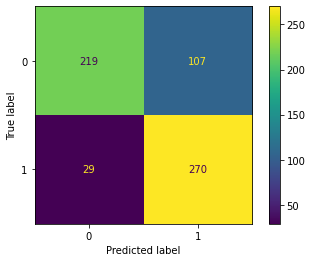

In [70]:
plot_confusion_matrix(svm_model, X_test, y_test)

## Referências

[[1]](https://developers.google.com/machine-learning/guides/text-classification) Text Classification Guide – Google Developers